In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
from copy import copy
%matplotlib inline

### Gather data and save it into a dataFrame

In [2]:
run step1_gatherData.py

In [3]:
df = pd.read_pickle('gp_stroop_fMRI_v1.pkl')
NrSbj = len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')
df['sbjRT2']= copy(df.sbjRT)
df.loc[df.sbjRT2<=300,'sbjRT2']=np.nan
df.loc[df.sbjACC==0,'sbjRT2']=np.nan
df.head(6)

A total of 24 subjects


,runId,blockType,trialType,ITIduration,stimCat,targetStim,corrAns,stimSet,imageId,condition,distractorStim,sbjResp,sbjRT,sbjACC,actualOnset,sbjId,sbjRT2
0,1,easy,con,2.96,nat,images\set1\11.jpg,4,1,11,4,natural.wav,4.0,550.404883,1.0,10.473697,3,550.404883
1,1,easy,con,2.48,nat,images\set1\17.jpg,4,1,17,4,natural.wav,4.0,600.426844,1.0,13.954600,3,600.426844
2,1,easy,con,2.46,nat,images\set1\7.jpg,4,1,7,4,natural.wav,4.0,550.499368,1.0,17.431003,3,550.499368
3,1,easy,inc,2.47,nat,images\set1\40.jpg,4,1,40,3,manmade.wav,1.0,500.437560,0.0,20.896429,3,NaN
4,1,easy,inc,2.61,nat,images\set1\1.jpg,4,1,1,3,manmade.wav,4.0,1083.760152,1.0,24.487905,3,1083.760152
5,1,easy,con,3.22,man,images\set1\48.jpg,1,1,48,4,manmade.wav,1.0,783.732531,1.0,28.713980,3,783.732531


### 1. Calculate overall Stroop accuracy

------ Group Stroop task mean ACC----------
blockType  trialType
easy       con          96.061198
           inc          92.578125
hard       con          96.614583
           inc          94.921875
Name: sbjACC, dtype: float64


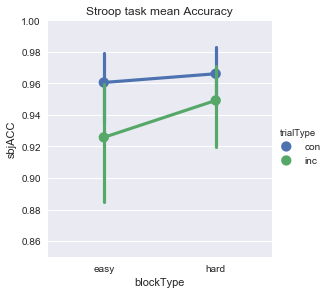

In [4]:
condM_stroopACC = df.groupby(['sbjId','blockType','trialType']).sbjACC.mean().reset_index()
# a dataframe of subject x condition 
gpResult_stroopACC = condM_stroopACC.groupby(['blockType','trialType']).sbjACC.mean()*100
print('------ Group Stroop task mean ACC----------')
print(gpResult_stroopACC)
g= sns.factorplot(x='blockType', y='sbjACC', hue='trialType', data = condM_stroopACC)
g.set(ylim=(.85, 1))
plt.title("Stroop task mean Accuracy")

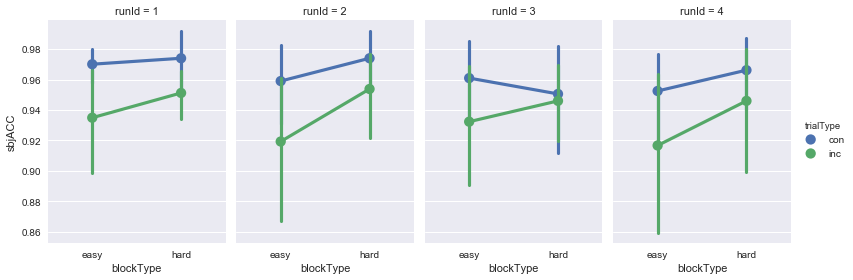

In [44]:
condM_stroopACC_byRep = df.groupby(['sbjId','runId','blockType','trialType']).sbjACC.mean().reset_index()
g= sns.factorplot(x='blockType', y='sbjACC', hue='trialType', col = 'runId', data = condM_stroopACC_byRep, aspect=.7)

### 2. Calculate overall Stroop RT (correct trials) [i.e., "sbj.RT2"]

------ Group Stroop task mean RT (correct)----------
blockType  trialType
easy       con          641.494082
           inc          679.139648
hard       con          645.181537
           inc          649.103877
Name: sbjRT2, dtype: float64


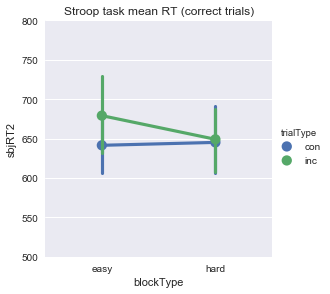

In [5]:
condM_stroopRT = df.groupby(['sbjId','blockType','trialType']).sbjRT2.mean().reset_index()
gpResult_stroopRT = condM_stroopRT.groupby(['blockType','trialType']).sbjRT2.mean()
print('------ Group Stroop task mean RT (correct)----------')
print(gpResult_stroopRT)
g = sns.factorplot(x='blockType', y='sbjRT2', hue='trialType', data = condM_stroopRT)
g.set(ylim=(500, 800))
plt.title("Stroop task mean RT (correct trials)")

CSPC = 33.72 ms
0.000558787425806


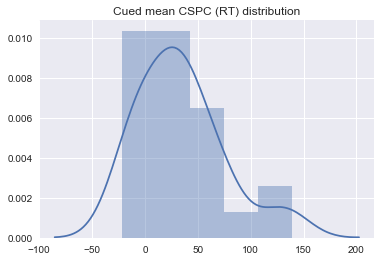

In [6]:
rt1 = np.array(condM_stroopRT.loc[(condM_stroopRT.blockType=='easy') & (condM_stroopRT.trialType=='inc'),'sbjRT2'])
rt2 = np.array(condM_stroopRT.loc[(condM_stroopRT.blockType=='easy') & (condM_stroopRT.trialType=='con'),'sbjRT2'])
rt3 = np.array(condM_stroopRT.loc[(condM_stroopRT.blockType=='hard') & (condM_stroopRT.trialType=='inc'),'sbjRT2'])
rt4 = np.array(condM_stroopRT.loc[(condM_stroopRT.blockType=='hard') & (condM_stroopRT.trialType=='con'),'sbjRT2'])
CSPC = rt1-rt2-(rt3-rt4)
print('CSPC = ' + '{:.2f}'.format(CSPC.mean()) + ' ms')
sns.distplot(CSPC)
plt.title("Cued mean CSPC (RT) distribution")
simple_inX_test = stats.ttest_rel(rt1-rt2,rt3-rt4)
print(simple_inX_test.pvalue)

### 2b. Calculate overall Stroop RT (correct trials) [i.e., "sbj.RT2"] by each repetition

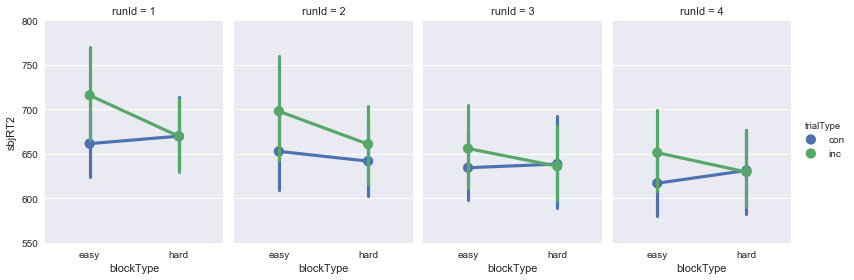

In [24]:
condM_stroopRT_byRep = df.groupby(['sbjId','runId','blockType','trialType']).sbjRT2.mean().reset_index()
gpResult_stroopRT_byRep = condM_stroopRT_byRep.groupby(['runId','blockType','trialType']).sbjRT2.mean()
#print(gpResult_stroopRT_byRep)
g = sns.factorplot(x='blockType', y='sbjRT2', hue='trialType', col = 'runId', data = condM_stroopRT_byRep, col_wrap=4, aspect=.7)
g.set(ylim=(550, 800))

### 3. Look at Subsequent Memory Data

In [7]:
M = pd.read_pickle('gp_memory_fMRI_v1.pkl')
old = M[M.blockType!='new']
new = M[M.blockType=='new']

#### 3a. Old item memory (all items) as a function of blocktype x trial type

Mean Hit Rate= 87.87%
------ Group Memory: Hits----------
blockType  trialType
easy       con          87.630208
           inc          89.583333
hard       con          86.718750
           inc          87.565104
Name: Hits, dtype: float64


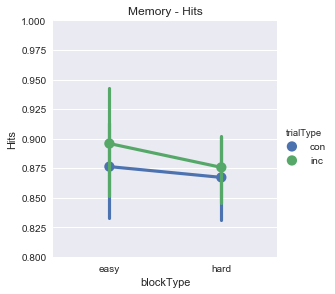

In [10]:
condM_oldACC = old.groupby(['sbjId','blockType','trialType']).sbjACC.mean().reset_index()
condM_oldACC.rename(columns={'sbjACC': 'Hits'}, inplace=True)
gpResult_oldACC = condM_oldACC.groupby(['blockType','trialType']).Hits.mean()*100
print('Mean Hit Rate= ' + '{:.2f}'.format(gpResult_oldACC.mean()) + '%')
print('------ Group Memory: Hits----------')
print(gpResult_oldACC)
g = sns.factorplot(x='blockType', y='Hits', hue='trialType', data = condM_oldACC)
plt.title("Memory - Hits")
g.set(ylim=(.8, 1))

In [12]:
hits1 = np.array(condM_oldACC.loc[(condM_oldACC.blockType=='easy') & (condM_oldACC.trialType=='inc'),'Hits'])
hits2 = np.array(condM_oldACC.loc[(condM_oldACC.blockType=='easy') & (condM_oldACC.trialType=='con'),'Hits'])
hits3 = np.array(condM_oldACC.loc[(condM_oldACC.blockType=='hard') & (condM_oldACC.trialType=='inc'),'Hits'])
hits4 = np.array(condM_oldACC.loc[(condM_oldACC.blockType=='hard') & (condM_oldACC.trialType=='con'),'Hits'])
simple_inX_test = stats.ttest_rel(hits1-hits2,hits3-hits4)
print(simple_inX_test.pvalue)

0.649596608686


#### 3b. Memory CR/FA

In [9]:
condM_newACC = new.groupby(['sbjId']).sbjACC.mean().reset_index()
condM_newACC.rename(columns={'sbjACC': 'CR'}, inplace=True)
gpResult_CR = condM_newACC.CR.mean()*100
print('Correct Rejection Rate = ' + '{:.2f}'.format(gpResult_CR) + '%')

Correct Rejection Rate = 84.17%
